In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [2]:
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [3]:
round(my_proportion_confint(1, 50, alpha=.05, method='normal')[0], 4)

-0.0188

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки. 

In [4]:
round(proportion_confint(1, 50, alpha=.05, method='wilson')[0], 4)

0.0035

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

$$\hat{p}\pm z_{1-\frac{\alpha}{2}} \sqrt{\frac{\hat{p}\left(1-\hat{p}\right)}{n}}$$

In [5]:
def n(p, alpha=.05):
    return (norm.ppf(1 - (alpha/2)) * np.sqrt(p * (1-p)) / 0.01) ** 2

In [6]:
np.ceil(n(.02))

753.0

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%? 

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
ps = np.linspace(0, 1, 102)
ns = [n(p) for p in ps]

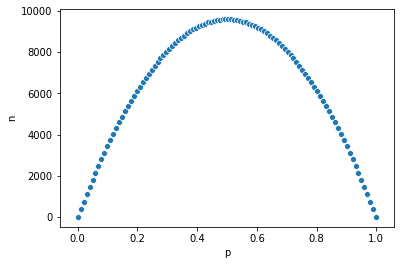

In [9]:
ax = sns.scatterplot(ps, ns);
ax.set_xlabel('p');
ax.set_ylabel('n');

In [10]:
n_max = max(ns)
idx = ns.index(n_max)
p_max = ps[idx]
print('p_max =', round(p_max, 4))

p_max = 0.495


In [11]:
half_lenght = .01
print('n_max =', np.ceil(samplesize_confint_proportion(proportion=p_max, half_length=half_lenght)))

n_max = 9603.0
